#                                      FIT5196 Data wrangling 

##                                      Assignment 3
## Data Integration and Reshaping



Author: Roshan Krishnan Thirikkott

Monash Student ID: 27591859

Date written: 20-Sep-2016

Version: 1.0

Program: Python 2.7.11 and Jupyter notebook

Libraries used:
* pandas (for dataframe, included in Anaconda Python 2.7) 
* re (for regular expression, included in Anaconda Python 2.7) 
* numpy (for numpy array, included in Anaconda Python 2.7)
* matplotlib (for plotting graphs and maps, included in Anaconda Python 2.7) 



###  Introduction


This code is developed for integration of cleaned and recent disaster data sets and display the integrated data on world map.  The whole process can be divided into the following two tasks: 
 
>** Task 1)** Integration of cleaned and recent disaster data <br >
**Task 2)** Mash up map for displaying the integrated data<br >



 ## Task 1: INTEGRATION OF CLEANED AND RECENT DISASTER DATA
 

The first part of the data integration process involves the following two data sources :
>** 1) Original cleaned disaster data (S1)** <br>
       This is a cleaned version of the disaster data set used in assignment 2, which contains information on disasters upto 2008/09 <br> <br>
>** 2) Recent disaster data (S2)** <br>
    This dataset contains the information on recent disasters is from the Centre for Research on the Epidemiology of Disasters (CRED) that has  launched the Emergency Events Database (EM-DAT). EM-DAT was created with the initial support of the World Health Organisation (WHO) and the Belgian Government <br>



In [1]:
# importing the required libraries

import pandas as pd
import re
import numpy as np

In [2]:
# read the input data file Disasters.csv
S1=pd.read_csv('Disasters.csv',index_col=0,
                   error_bad_lines=False,  
                   warn_bad_lines=True)

Initial examination of the dataframe loaded by checking the head, tail of the dataframe

In [3]:
S1.head(5)

,Start,End,Country,Location,Type,Sub_Type,Names,Killed,Affected,International support
0,1965-06-01,1965-06-01,Japan,NaN,storm,tropical cyclone,Dinah,61.0,30000.0,1934.944
1,2004-09-01,2004-09-01,Grenada,NaN,storm,tropical cyclone,Ivan,39.0,60000.0,1090.830
2,1995-03-01,1995-03-01,Russia,Kalmoukie:Daghestan (Mer ...,transport accident,water,NaN,52.0,NaN,NaN
3,1983-02-01,1983-02-01,Cuba,Santiago de Cuba:Pinar d ...,flood,NaN,NaN,15.0,164575.0,905.275
4,1996-07-01,1996-07-01,Russia,Volgorgrad,industrial accident,gas leak,Oil refinery,NaN,NaN,NaN


**Columns: **<br>
1) Start - Date (YYYY-MM-DD) format with date as the first date of the month in which incident occured<br>
2) End - Date (YYYY-MM-DD) format with date as the first date of the month in which incident ended<br>
3) Country - Country name <br>
4) Location - City name <br>
5) Type - Type of disaster <br>
6) Sub_Type - Sub category of disaster <br>
7) Killed - number of people killed <br>
8) Affected - Number of people affected <br>
9) International Support - Monetory support <br>

In [4]:
# read the input data file Disasters.csv
#S2=pd.read_csv('Disasters_Recent.csv',index_col=0,
#                   error_bad_lines=False,  
#                   warn_bad_lines=True)
S2 = pd.read_csv('Disasters_Recent.csv',  skiprows=1, 
                 names=['Year','Disaster Type','Country ISO','Country name','disaster group',
                        'disaster subgroup','disaster subtype','continent','region',
                        'occurrence','Total deaths','Affected','Injured','Homeless','Total affected',
                        'Total damage', 'International support'],
                      error_bad_lines=False,  
                       warn_bad_lines=True)

Inspect data

In [5]:
S2.head(5)

,Year,Disaster Type,Country ISO,Country name,disaster group,disaster subgroup,disaster subtype,continent,region,occurrence,Total deaths,Affected,Injured,Homeless,Total affected,Total damage,International support
0,2000,Drought,AFG,Afghanistan,Natural,Climatological,Drought,Asia,Southern Asia,1,37,2580000,0,0,2580000,50,122245.87
1,2000,Drought,ARM,Armenia,Natural,Climatological,Drought,Asia,Western Asia,1,0,297000,0,0,297000,100000,5400.00
2,2000,Drought,AZE,Azerbaijan,Natural,Climatological,Drought,Asia,Western Asia,1,0,0,0,0,0,100000,0.00
3,2000,Drought,BOL,Bolivia (Plurinational State of),Natural,Climatological,Drought,Americas,South America,1,0,20000,0,0,20000,0,0.00
4,2000,Drought,BIH,Bosnia and Herzegovina,Natural,Climatological,Drought,Europe,Southern Europe,1,0,0,0,0,0,158000,0.00


**Columns : ** <br>
1) Year - year of incident <br>
2) Disaster Type - Type of incident <br>
3) Country iso - ISO code for the country name <br>
4) Country name - Name of the country <br>
5) Disaster group - Group of disaster (Natural/ Technological/ Complex disasters) <br>
6) Disaster subgroup - Subgroup of disaster <br>
7) Disaster subtype - Subtype of disaster <br>
8) Continent - Continent name <br>
9) Region - Region name <br>
10) Occurence - Number of occurence <br>
11) Total deaths - Number of deaths <br>
12) Affected - Number of people affected <br>
13) Injured - Number of people injured <br>
14) Homeless - Number of people left homeless <br>
15) Total affected - Total number of people affected <br>
16) Total damage - Total damage in thousand dollars <br>
17) International support - International support received <br>

On inspection it can be seen that there are mismatches in the columns of the two datasets S1 and S2 and need to be made the same before combining the two. Let us first try to match the columns of S1 and S2
>**1.1) SCHEMA CONFLICTS **<br>
    >>** 1.1.1) NAMING CONFLICTS **<br>
    We must examine the various values in the columns of one dataframe with columns that look similar in the other dataframe to establish a relationship, and then modify the names such that both dataframes have the same values. Let us first rename all column headers into uppercase for a unified format.

In [6]:
S1.columns = map(str.upper, S1.columns)
S2.columns = map(str.upper, S2.columns)

Check unique values in various non numerical columns to identify the values it holds to establish a relationship

In [7]:
S1['COUNTRY'].unique()

array(['Japan', 'Grenada', 'Russia', 'Cuba', 'Turkey', 'Pakistan',
       'Honduras', 'Colombia', 'Senegal', 'Mexico', 'Canada', 'Algeria',
       'India', 'Viet Nam', 'Bangladesh', 'Taiwan', 'Soviet Union',
       'Tanzania', 'Morocco', 'Haiti', 'United States', 'China', 'Nigeria',
       'Venezuela', 'Switzerland', 'Philippines', 'Mozambique', 'Ukraine',
       'Poland', 'Maldives', 'Luxembourg', 'Brazil', 'Spain', 'Bolivia',
       'United Kingdom', 'Iran', 'Egypt', 'Czech Republic', 'Macedonia',
       'Jamaica', 'Saint Kitts and Nevis', 'Dominican Republic',
       'Portugal', "Cote d'Ivoire", 'Chile', 'Bulgaria', 'Iraq', 'Somalia',
       'Argentina', 'Peru', 'Indonesia', 'Benin', 'Australia', 'Niger',
       'Denmark', 'France', 'Fiji', 'Germany', 'Burkina Faso', 'Romania',
       'Kenya', 'Mali', 'Thailand', 'Serbia', 'Eritrea', 'Sri Lanka',
       'Laos', 'Puerto Rico', 'Guinea', 'Djibouti', 'Italy', 'Ecuador',
       'Slovakia', 'Bosnia and Herzegovina', 'Yemen', 'Mongolia', 

In [8]:
S2['COUNTRY NAME'].unique()

array(['Afghanistan', 'Armenia', 'Azerbaijan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Bulgaria', 'China', 'Cuba', 'Cyprus', 'Georgia', 'Honduras',
       'India', 'Jamaica', 'Jordan', 'Madagascar',
       'Moldova (the Republic of)', 'Mongolia', 'Nicaragua', 'Romania',
       'Somalia', 'Sudan (the)', 'Tajikistan',
       'United States of America (the)', 'Uzbekistan', 'Bangladesh',
       'Colombia', 'Greece', 'Iceland', 'Indonesia',
       'Iran (Islamic Republic of)', 'Japan', 'Mexico', 'Papua New Guinea',
       'Russian Federation (the)', 'Tanzania, United Republic of',
       'Turkey', 'Turkmenistan', 'Angola', 'Benin', 'Burundi', 'Cameroon',
       'Central African Republic', 'Chad',
       'Congo (the Democratic Republic of the)', 'Congo (the)', 'Djibouti',
       'Ecuador', 'El Salvador', 'Ethiopia', 'Gambia (the)', 'Guinea',
       'Ireland', 'Israel', 'Kazakhstan', 'Kenya',
       'Korea (the Republic of)', "Lao People's Democratic Repub

In [9]:
S1['TYPE'].unique()

array(['storm', 'transport accident', 'flood', 'industrial accident',
       'miscellaneous accident', 'earthquake (seismic activity)',
       'volcano', 'mass movement wet', 'epidemic', 'extreme temperature',
       'wildfire', 'drought', 'insect infestation', 'mass movement dry',
       'complex disasters'], dtype=object)

In [10]:
S2['DISASTER TYPE'].unique()

array(['Drought', 'Earthquake', 'Epidemic', 'Extreme temperature ',
       'Flood', 'Insect infestation', 'Landslide', 'Mass movement (dry)',
       'Storm', 'Volcanic activity', 'Wildfire', 'Impact',
       'Animal accident'], dtype=object)

In [11]:
S1['SUB_TYPE'].unique()

array(['tropical cyclone', 'water', nan, 'gas leak', 'explosion',
       'collapse', 'earthquake (ground shaking)', 'general flood',
       'volcanic eruption', 'road', 'fire', 'landslide',
       'storm surge/coastal flood', 'flash flood',
       'viral infectious diseases', 'local storm', 'rail', 'air', 'other',
       'extreme winter conditions', 'bacterial infectious diseases',
       'heat wave', 'forest fire', 'extratropical cyclone', 'poisoning',
       'drought', 'chemical spill', 'scrub/grassland fire', 'cold wave',
       'avalanche', 'locust', 'parasitic infectious diseases', 'rockfall',
       'radiation', 'tsunami', 'grasshopper', 'grasshopper/locust',
       'bush/brush fire', 'general flood/mudslide',
       'extratropical cyclone (winter storm)', 'debris flow', 'famine',
       'subsidence', 'oil spill'], dtype=object)

In [12]:
S2['DISASTER SUBTYPE'].unique()

array(['Drought', 'Ground movement', '--', 'Bacterial disease',
       'Viral disease', 'Parasitic disease', 'Cold wave', 'Heat wave',
       'Flash flood', 'Riverine flood', 'Coastal flood', 'Locust',
       'Landslide', 'Avalanche', 'Subsidence', 'Convective storm',
       'Tropical cyclone', 'Ash fall', 'Forest fire',
       'Land fire (Brush, Bush, Pastur', 'Extra-tropical storm', 'Tsunami',
       'Severe winter conditions', 'Rockfall', 'Lava flow'], dtype=object)

In [13]:
S2['DISASTER GROUP'].unique()

array(['Natural'], dtype=object)

In [14]:
S2['DISASTER SUBGROUP'].unique()

array(['Climatological', 'Geophysical', 'Biological', 'Meteorological',
       'Hydrological', 'Extra-terrestrial'], dtype=object)

In [15]:
S1['LOCATION'].unique()

array([nan, 'Kalmoukie:Daghestan (Mer ...', 'Santiago de Cuba:Pinar d ...',
       ..., 'Eastern Afar:Eastern Som ...',
       'Lingshi (Shanxi province) ...', 'Mashad'], dtype=object)

In [16]:
S2['CONTINENT'].unique()

array(['Asia', 'Americas', 'Europe', 'Africa', 'Oceania'], dtype=object)

In [17]:
S2['REGION'].unique()

array(['Southern Asia', 'Western Asia', 'South America', 'Southern Europe',
       'Eastern Europe', 'Eastern Asia', 'Caribbean', 'Central America',
       'Eastern Africa', 'Northern Africa', 'Central Asia',
       'Northern America', 'Northern Europe', 'South-Eastern Asia',
       'Melanesia', 'Middle Africa', 'Western Africa', 'Southern Africa',
       'Micronesia', 'Australia and New Zealand', 'Western Europe',
       'Polynesia'], dtype=object)

In [18]:
S1['NAMES'].unique()

array(['Dinah', 'Ivan', nan, ..., 'Hurricane', 'Greg', 'Boeing 767-300'], dtype=object)

In the numerical columns YEAR(S2) stands for year of incident which has no readily available match with START or END as such which are date types. The KILLED(S1) can be matched with TOTAL DEATHS(S2). For column AFFECTED(S1), it can be matched with AFFECTED or TOTAL AFFECTED in S2. The AFFECTED(S1) depicts the total number of people affected by the incident. While in the S2, we have additional columns like INJURED and HOMELESS, which could mean that TOTAL AFFECTED may be further subdivided. Let us first find out the possible relationship. It could be that TOTAL AFFECTED = AFFECTED + INJURED + HOMELESS. Let us explore this possibility.

In [19]:
S2_TA_NOTMATCH = S2[(S2['TOTAL AFFECTED']-S2['AFFECTED']-S2['INJURED']-S2['HOMELESS']) != 0]
S2_TA_NOTMATCH

Thus the following relationships can be established
>>>1) COUNTRY (S1) can be matched with COUNTRY NAME (S2) <br>
   >>>2) TYPE (S1) can be matched with DISASTER TYPE (S2)<br>
    >>>3) SUB_TYPE (S1) can be matched with DISASTER SUBTYPE (S2) <br>
    >>>4) KILLED (S1) can be matched with TOTAL DEATHS (S2) <br>
    >>>6) AFFECTED (S1) can be matched with TOTAL AFFECTED (S2) <br>
    >>>7) INTERNATIONAL SUPPORT (S1) can be matched with INTERNATIONAL SUPPORT (S2) <br>
    >>>8) There are no corresponding matches for LOCATION, NAMES, START and END (S1) in S2 <br>
    >>>9) There are no corresponding matches for COUNTRY ISO, CONTINENT, DISASTER GROUP, DISASTER SUBGROUP, REGION, OCCURENCE, AFFECTED, INJURED, HOMELESS, TOTAL DAMAGE (S2) in S1 <br>

| S1  | S2 |
| --- | -- |
| START  |  |
| END  |   |
|  | YEAR |
|  | COUNTRY ISO |
| COUNTRY | COUNTRY NAME |
| LOCATION | |
|  | DISASTER GROUP |
|  | DISASTER SUBGROUP |
| TYPE | DISASTER TYPE |
| SUB_TYPE | DISASTER SUBTYPE |
|  | CONTINENT |
|  | REGION |
|  | OCCURRENCE |
| NAMES |  | 
| KILLED | TOTAL DEATHS |
|  | AFFECTED |
|  | INJURED |
|  | HOMELESS |
| AFFECTED | TOTAL AFFECTED |
|  | TOTAL DAMAGE |
| INTERNATIONAL SUPPORT | INTERNATIONAL SUPPORT |


So let us first resolve the naming conflicts by changing the column names in S1 in line with S2


In [21]:
S1.rename(columns={'COUNTRY': 'COUNTRY NAME', 'TYPE': 'DISASTER TYPE', 'SUB_TYPE': 'DISASTER SUBTYPE','KILLED': 'TOTAL DEATHS','AFFECTED':'TOTAL AFFECTED'}, inplace=True)
S1.head(5)

>>** 1.1.2) STRUCTURAL CONFLICTS **<br>
    These conflicts correspond to the inconsistency in the data structure among schemas. In this case we have START and END in S1, while there is only YEAR in S2. So we must introduce new column YEAR in S1 which corresponds to the year of the incident, which can be extracted from the START column. 

In [23]:
#create column Year which is the year in which incident occured and is of type int in S2
S1['YEAR'] = S1['START'].astype(str).str[0:4].astype(int)

The TOTAL DEATHS AND TOTAL AFFECTED ARE INT in S2 while float in S1, need to be made uniform

In [25]:
S2['TOTAL DEATHS']=S2['TOTAL DEATHS'].astype(float)
S2['TOTAL AFFECTED']=S2['TOTAL AFFECTED'].astype(float)

In [26]:
S2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4503 entries, 0 to 4502
Data columns (total 17 columns):
YEAR                     4503 non-null int64
DISASTER TYPE            4503 non-null object
COUNTRY ISO              4503 non-null object
COUNTRY NAME             4503 non-null object
DISASTER GROUP           4503 non-null object
DISASTER SUBGROUP        4503 non-null object
DISASTER SUBTYPE         4503 non-null object
CONTINENT                4503 non-null object
REGION                   4503 non-null object
OCCURRENCE               4503 non-null int64
TOTAL DEATHS             4503 non-null float64
AFFECTED                 4503 non-null int64
INJURED                  4503 non-null int64
HOMELESS                 4503 non-null int64
TOTAL AFFECTED           4503 non-null float64
TOTAL DAMAGE             4503 non-null int64
INTERNATIONAL SUPPORT    4503 non-null float64
dtypes: float64(3), int64(6), object(8)
memory usage: 598.1+ KB


>>** 1.1.3) ENTITY RESOLUTION CONFLICTS **<br>
These are conflicts related to different levels of abstraction of data or units or value heterogenity

First let us examine the COUNTRY NAME columns in both data frames.

In [27]:
S1['COUNTRY NAME'].unique()

array(['Japan', 'Grenada', 'Russia', 'Cuba', 'Turkey', 'Pakistan',
       'Honduras', 'Colombia', 'Senegal', 'Mexico', 'Canada', 'Algeria',
       'India', 'Viet Nam', 'Bangladesh', 'Taiwan', 'Soviet Union',
       'Tanzania', 'Morocco', 'Haiti', 'United States', 'China', 'Nigeria',
       'Venezuela', 'Switzerland', 'Philippines', 'Mozambique', 'Ukraine',
       'Poland', 'Maldives', 'Luxembourg', 'Brazil', 'Spain', 'Bolivia',
       'United Kingdom', 'Iran', 'Egypt', 'Czech Republic', 'Macedonia',
       'Jamaica', 'Saint Kitts and Nevis', 'Dominican Republic',
       'Portugal', "Cote d'Ivoire", 'Chile', 'Bulgaria', 'Iraq', 'Somalia',
       'Argentina', 'Peru', 'Indonesia', 'Benin', 'Australia', 'Niger',
       'Denmark', 'France', 'Fiji', 'Germany', 'Burkina Faso', 'Romania',
       'Kenya', 'Mali', 'Thailand', 'Serbia', 'Eritrea', 'Sri Lanka',
       'Laos', 'Puerto Rico', 'Guinea', 'Djibouti', 'Italy', 'Ecuador',
       'Slovakia', 'Bosnia and Herzegovina', 'Yemen', 'Mongolia', 

In [28]:
S2['COUNTRY NAME'].unique()

array(['Afghanistan', 'Armenia', 'Azerbaijan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Bulgaria', 'China', 'Cuba', 'Cyprus', 'Georgia', 'Honduras',
       'India', 'Jamaica', 'Jordan', 'Madagascar',
       'Moldova (the Republic of)', 'Mongolia', 'Nicaragua', 'Romania',
       'Somalia', 'Sudan (the)', 'Tajikistan',
       'United States of America (the)', 'Uzbekistan', 'Bangladesh',
       'Colombia', 'Greece', 'Iceland', 'Indonesia',
       'Iran (Islamic Republic of)', 'Japan', 'Mexico', 'Papua New Guinea',
       'Russian Federation (the)', 'Tanzania, United Republic of',
       'Turkey', 'Turkmenistan', 'Angola', 'Benin', 'Burundi', 'Cameroon',
       'Central African Republic', 'Chad',
       'Congo (the Democratic Republic of the)', 'Congo (the)', 'Djibouti',
       'Ecuador', 'El Salvador', 'Ethiopia', 'Gambia (the)', 'Guinea',
       'Ireland', 'Israel', 'Kazakhstan', 'Kenya',
       'Korea (the Republic of)', "Lao People's Democratic Repub

From a brief examination of the unique values we can establish that the country names are slightly different in both datasets. Hence, we need a unified version of the same. We can make use of country_info.csv file which contains details about various countries and we can resolve this conflict. 

In [29]:
country=pd.read_csv('country_info.csv',
                    keep_default_na=False,
                   error_bad_lines=False,  
                   warn_bad_lines=True)

In [30]:
country.head(5)

,ISO3166A2,ISO3166A3,ISO3166N3,FIPS104,ISOen_name,ISOen_proper,ISOen_ro_name,ISOen_ro_proper,ISOfr_name,ISOfr_proper,...,latitude,longitude,maxlatitude,minlatitude,maxlongitude,minlongitude,url_gov,url_stats,url_gis,url_post
0,AF,AFG,4,AF,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,...,33.000000,65.0,38.48,29.38,74.88,60.48,president.gov.af,cso.gov.af,,afghanpost.gov.af/
1,AX,ALA,248,,Aland Islands,Aland Islands,_�land Islands,_�land Islands,"_�land, _�les",_�les _�land,...,60.250000,20.0,60.60,59.90,20.62,19.30,aland.ax,asub.ax,,posten.aland.fi
2,AL,ALB,8,AL,Albania,Albania,Albania,Albania,Albanie,Albanie,...,41.000000,20.0,42.65,39.65,21.06,19.26,e-albania.al,instat.gov.al,,icc-al.org
3,DZ,DZA,12,AG,Algeria,Algeria,Algeria,Algeria,Alg_�rie,Alg_�rie,...,28.000000,3.0,37.09,18.96,12.00,-8.67,el-mouradia.dz,ons.dz,,
4,AS,ASM,16,AQ,American Samoa,American Samoa,American Samoa,American Samoa,Samoa Am_�ricaines,Samoa Am_�ricaines,...,-14.333333,-170.0,-14.15,-14.40,-170.87,-169.41,americansamoa.gov,census.gov,,usps.gov


In [31]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 71 columns):
ISO3166A2               249 non-null object
ISO3166A3               249 non-null object
ISO3166N3               249 non-null int64
FIPS104                 249 non-null object
ISOen_name              249 non-null object
ISOen_proper            249 non-null object
ISOen_ro_name           249 non-null object
ISOen_ro_proper         249 non-null object
ISOfr_name              249 non-null object
ISOfr_proper            249 non-null object
ISOes_name              249 non-null object
UNGEGNen_name           249 non-null object
UNGEGNen_longname       249 non-null object
UNGEGNfr_name           249 non-null object
UNGEGNfr_longname       249 non-null object
UNGEGNes_name           249 non-null object
UNGEGNes_longname       249 non-null object
UNGEGNru_name           249 non-null object
UNGEGNru_longname       249 non-null object
UNGEGNlc_ro_name        249 non-null object
UNGEGNlc_ro_long

In [32]:
country['ISOen_name'].unique()

array(['Afghanistan', 'Aland Islands', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda',
       'Bhutan', ' Bolivia, Plurinational State of',
       ' Bonaire, Sint Eustatius and Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Bouvet Island', 'Brazil',
       'British Indian Ocean Territory', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada',
       'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad',
       'Chile', 'China', 'Christmas Island', 'Cocos (Keeling) Islands',
       'Colombia', 'Comoros', 'Congo',
       ' Congo, The Democratic Republic of the', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czec

Find out the country names from S1 which do not match the ISOen_name of country list. Then we will have to rectify those. Also we can add the COUNTRY ISO and continent columns to S1 based on this.

In [33]:
S1_err=S1[~S1['COUNTRY NAME'].isin(country['ISOen_name'])]

In [34]:
S1_err['COUNTRY NAME'].unique()

array(['Russia', 'Taiwan', 'Soviet Union', 'Tanzania', 'Venezuela',
       'Bolivia', 'Iran', 'Macedonia', 'Laos',
       'Democratic Republic of the Congo', 'South Korea', 'Palestine',
       'North Korea', 'Macau', 'Cayman Is', 'Libya', 'Marshall Is',
       'Moldova', 'Yugoslavia', 'Turks and Caicos Is', 'Cook Is',
       'Canary Is', 'Virgin Is (US)', 'Northern Mariana Is',
       'Saint Vincent and the Grenadines', 'Azores', 'Syria',
       'Virgin Is (UK)', 'Solomon Is', 'Micronesia',
       'Saint Helena, Ascension and Tristan da Cunha'], dtype=object)

It can be noted that some names have a leading space in country dataframe, which we need to remove to match with S1

In [35]:
#remove leading whitespaces
country['ISOen_name']=country['ISOen_name'].map(str.strip)

In [36]:
#check for mismatch in country names between S1 and country dataframes
S1_err=S1[~S1['COUNTRY NAME'].isin(country['ISOen_name'])]

In [37]:
S1_err['COUNTRY NAME'].unique()

array(['Russia', 'Taiwan', 'Soviet Union', 'Tanzania', 'Venezuela',
       'Bolivia', 'Iran', 'Macedonia', 'Laos',
       'Democratic Republic of the Congo', 'South Korea', 'Palestine',
       'North Korea', 'Macau', 'Cayman Is', 'Libya', 'Marshall Is',
       'Moldova', 'Yugoslavia', 'Turks and Caicos Is', 'Cook Is',
       'Canary Is', 'Virgin Is (US)', 'Northern Mariana Is',
       'Saint Vincent and the Grenadines', 'Azores', 'Syria',
       'Virgin Is (UK)', 'Solomon Is', 'Micronesia'], dtype=object)

Some countries with leading spaces are now removed. There are country names which ends in 'Is' which stands for Islands. Those instances need to be replaced.

In [38]:
S1['COUNTRY NAME NEW']=S1['COUNTRY NAME'].str.extract(r'(.*) Is$').str.strip()+(' Islands')

C:\Users\roshan\Anaconda2.7\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':


In [39]:
#country names which do not end in 'Is' is to be replaced by original names
S1['COUNTRY NAME NEW']=S1["COUNTRY NAME NEW"].fillna(S1["COUNTRY NAME"])

In [40]:
S1_err=S1[~S1['COUNTRY NAME NEW'].isin(country['ISOen_name'])]

In [41]:
S1_err['COUNTRY NAME NEW'].unique()

array(['Russia', 'Taiwan', 'Soviet Union', 'Tanzania', 'Venezuela',
       'Bolivia', 'Iran', 'Macedonia', 'Laos',
       'Democratic Republic of the Congo', 'South Korea', 'Palestine',
       'North Korea', 'Macau', 'Libya', 'Moldova', 'Yugoslavia',
       'Canary Islands', 'Virgin Is (US)',
       'Saint Vincent and the Grenadines', 'Azores', 'Syria',
       'Virgin Is (UK)', 'Micronesia'], dtype=object)

Of this on comparing with country list provided as of 2002, there are no occurences of Azores and Canary Is and Yugoslavia(which was broke up into several countries). Azores belongs to Portugal while Canary Is belongs to Spain. Since the main aim of this task is to find out the geographical distribution of disasters it is best to replace them with the country they belong to.
Other country names have to be replaced with corresponding name in country_info.csv

In [42]:
S1['COUNTRY NAME NEW'] = S1['COUNTRY NAME NEW'].replace(['Russia','Soviet Union'], 'Russian Federation')
S1['COUNTRY NAME NEW'] = S1['COUNTRY NAME NEW'].replace(['Taiwan'], 'Taiwan, Province of China')
S1['COUNTRY NAME NEW'] = S1['COUNTRY NAME NEW'].replace(['Tanzania'], 'Tanzania, United Republic of')
S1['COUNTRY NAME NEW'] = S1['COUNTRY NAME NEW'].replace(['Venezuela'], 'Venezuela, Bolivarian Republic of')
S1['COUNTRY NAME NEW'] = S1['COUNTRY NAME NEW'].replace(['Bolivia'], 'Bolivia, Plurinational State of')
S1['COUNTRY NAME NEW'] = S1['COUNTRY NAME NEW'].replace(['Iran'], 'Iran, Islamic Republic of')
S1['COUNTRY NAME NEW'] = S1['COUNTRY NAME NEW'].replace(['Macedonia'], 'Macedonia, The Former Yugoslav Republic of')
S1['COUNTRY NAME NEW'] = S1['COUNTRY NAME NEW'].replace(['Laos'], "Lao People's Democratic Republic")
S1['COUNTRY NAME NEW'] = S1['COUNTRY NAME NEW'].replace(['Democratic Republic of the Congo'], 'Congo, The Democratic Republic of the')
S1['COUNTRY NAME NEW'] = S1['COUNTRY NAME NEW'].replace(['South Korea'], 'Korea, Republic of')
S1['COUNTRY NAME NEW'] = S1['COUNTRY NAME NEW'].replace(['Palestine'], 'Occupied Palestinian Territory')
S1['COUNTRY NAME NEW'] = S1['COUNTRY NAME NEW'].replace(['North Korea'], "Korea, Democratic People's Republic of")
S1['COUNTRY NAME NEW'] = S1['COUNTRY NAME NEW'].replace(['Macau'], 'Macao')
S1['COUNTRY NAME NEW'] = S1['COUNTRY NAME NEW'].replace(['Libya'], 'Libyan Arab Jamahiriya')
S1['COUNTRY NAME NEW'] = S1['COUNTRY NAME NEW'].replace(['Moldova'], 'Moldova, Republic of')
S1['COUNTRY NAME NEW'] = S1['COUNTRY NAME NEW'].replace(["Virgin Is (UK)"], 'Virgin Islands, British')
S1['COUNTRY NAME NEW'] = S1['COUNTRY NAME NEW'].replace(['Saint Vincent and the Grenadines'], 'Saint Vincent and The Grenadines')
S1['COUNTRY NAME NEW'] = S1['COUNTRY NAME NEW'].replace(['Syria'], 'Syrian Arab Republic')
S1['COUNTRY NAME NEW'] = S1['COUNTRY NAME NEW'].replace(['Virgin Is (US)'], 'Virgin Islands, U.S.')
S1['COUNTRY NAME NEW'] = S1['COUNTRY NAME NEW'].replace(['Micronesia'], 'Micronesia, Federated States of')
S1['COUNTRY NAME NEW'] = S1['COUNTRY NAME NEW'].replace(['Azores'], 'Portugal')
S1['COUNTRY NAME NEW'] = S1['COUNTRY NAME NEW'].replace(['Canary Islands'], 'Spain')


In [43]:
S1_err=S1[~S1['COUNTRY NAME NEW'].isin(country['ISOen_name'])]

In [44]:
S1_err['COUNTRY NAME NEW'].unique()

array(['Yugoslavia'], dtype=object)

Since Yugoslavia was disintegrated into 6 countries it is better to remove the same to remove any inconsistency in the data as it will be difficult to get the exact geographic location of the disaster.

In [45]:
S1=S1[S1['COUNTRY NAME NEW'] != 'Yugoslavia']

In [46]:
S1_err=S1[~S1['COUNTRY NAME NEW'].isin(country['ISOen_name'])]

In [47]:
S1_err['COUNTRY NAME NEW'].unique()

array([], dtype=object)

Country names have been successfully corrected in 'COUNTRY NAME NEW'

Let us now examine the continent names in country dataframe to check the values.

In [48]:
country['continent'].unique()

array(['AS', 'EU', 'AF', 'OC', 'NA', 'AN', 'SA'], dtype=object)

In [49]:
country['ISOregion'].unique()

array([142, 150,   2,   9,  19,   0], dtype=int64)

In [50]:
country['ISOsubregion'].unique()

array([ 34, 154,  39,  15,  61,  17,  29,   0,   5, 145,  53, 155, 151,
        13,  11,  21,  18,  35,  14,  30,  54,  57, 143], dtype=int64)

In [51]:
country['subcontinent'].unique()

array(['', 'CA', 'ME'], dtype=object)

ISOregion/ISOsubregion/subcontinent columns does not match with the Region column of S2. <br>
Also no match for Location column can be made<br>

Also continent in S2 is full name of continent while in country info file it is 2 letter code WE need to resolve this. <br>

We must add ISO3166A3, ISOen_name and continent columns to S1 and S2 to make those in the same format<br>

In [52]:
df_country=country[['ISO3166A3','ISOen_name','continent']]

In [53]:
S1=pd.merge(S1,df_country,left_on='COUNTRY NAME NEW',right_on='ISOen_name',how='left')
S1.head(5)

,START,END,COUNTRY NAME,LOCATION,DISASTER TYPE,DISASTER SUBTYPE,NAMES,TOTAL DEATHS,TOTAL AFFECTED,INTERNATIONAL SUPPORT,YEAR,COUNTRY NAME NEW,ISO3166A3,ISOen_name,continent
0,1965-06-01,1965-06-01,Japan,NaN,storm,tropical cyclone,Dinah,61.0,30000.0,1934.944,1965,Japan,JPN,Japan,AS
1,2004-09-01,2004-09-01,Grenada,NaN,storm,tropical cyclone,Ivan,39.0,60000.0,1090.830,2004,Grenada,GRD,Grenada,NA
2,1995-03-01,1995-03-01,Russia,Kalmoukie:Daghestan (Mer ...,transport accident,water,NaN,52.0,NaN,NaN,1995,Russian Federation,RUS,Russian Federation,EU
3,1983-02-01,1983-02-01,Cuba,Santiago de Cuba:Pinar d ...,flood,NaN,NaN,15.0,164575.0,905.275,1983,Cuba,CUB,Cuba,NA
4,1996-07-01,1996-07-01,Russia,Volgorgrad,industrial accident,gas leak,Oil refinery,NaN,NaN,NaN,1996,Russian Federation,RUS,Russian Federation,EU


In [54]:
#check for any null
S11null=S1[S1.ISO3166A3.isnull()]
S11null.head(5)

,START,END,COUNTRY NAME,LOCATION,DISASTER TYPE,DISASTER SUBTYPE,NAMES,TOTAL DEATHS,TOTAL AFFECTED,INTERNATIONAL SUPPORT,YEAR,COUNTRY NAME NEW,ISO3166A3,ISOen_name,continent


We have fixed problems in country names in S1 and also added the columns for ISO and continent from country dataframe.

Let us examine S2. The country ISO names are already available in S2 dataframe so we can try to match the same with the ISO3166A3 column of country dataframe. Also, the continent names are given in expanded form in S2, while in country dataframe the two digit representation is given, so we can import the continent column as well. But before that, we need to check for any ISO names that has a mismatch between the two.

In [55]:
S2_err=S2[~S2['COUNTRY ISO'].isin(country['ISO3166A3'])]

In [56]:
S2_err['COUNTRY NAME'].unique()

array(['Serbia Montenegro', 'Canary Is'], dtype=object)

Serbia montenegro disintegrated to serbia and montenegro. Better to delete as exact geographical location may be just one country. And in place of Canary Is replace with Spain

In [57]:
#extract S2 excluding Serbia Montenegro
S2=S2[S2['COUNTRY NAME'] != 'Serbia Montenegro']

In [58]:
#ISO for Canary Is(SPI) is replaced with Spain(ESP)
S2['COUNTRY ISO'] = S2['COUNTRY ISO'].replace(['SPI'], 'ESP')

In [59]:
#check for any unresolved mismatches in country ISO
S2_err=S2[~S2['COUNTRY ISO'].isin(country['ISO3166A3'])]

In [60]:
S2_err['COUNTRY NAME'].unique()

array([], dtype=object)

In [61]:
S2=pd.merge(S2,df_country,left_on='COUNTRY ISO',right_on='ISO3166A3',how='left')

In [62]:
S2.head(5)

,YEAR,DISASTER TYPE,COUNTRY ISO,COUNTRY NAME,DISASTER GROUP,DISASTER SUBGROUP,DISASTER SUBTYPE,CONTINENT,REGION,OCCURRENCE,TOTAL DEATHS,AFFECTED,INJURED,HOMELESS,TOTAL AFFECTED,TOTAL DAMAGE,INTERNATIONAL SUPPORT,ISO3166A3,ISOen_name,continent
0,2000,Drought,AFG,Afghanistan,Natural,Climatological,Drought,Asia,Southern Asia,1,37.0,2580000,0,0,2580000.0,50,122245.87,AFG,Afghanistan,AS
1,2000,Drought,ARM,Armenia,Natural,Climatological,Drought,Asia,Western Asia,1,0.0,297000,0,0,297000.0,100000,5400.00,ARM,Armenia,AS
2,2000,Drought,AZE,Azerbaijan,Natural,Climatological,Drought,Asia,Western Asia,1,0.0,0,0,0,0.0,100000,0.00,AZE,Azerbaijan,AS
3,2000,Drought,BOL,Bolivia (Plurinational State of),Natural,Climatological,Drought,Americas,South America,1,0.0,20000,0,0,20000.0,0,0.00,BOL,"Bolivia, Plurinational State of",SA
4,2000,Drought,BIH,Bosnia and Herzegovina,Natural,Climatological,Drought,Europe,Southern Europe,1,0.0,0,0,0,0.0,158000,0.00,BIH,Bosnia and Herzegovina,EU


We now need to check for any other irregularity in the values between DISASTER TYPE AND DISASTER SUBTYPE

In [63]:
S1['DISASTER TYPE'].unique()

array(['storm', 'transport accident', 'flood', 'industrial accident',
       'miscellaneous accident', 'earthquake (seismic activity)',
       'volcano', 'mass movement wet', 'epidemic', 'extreme temperature',
       'wildfire', 'drought', 'insect infestation', 'mass movement dry',
       'complex disasters'], dtype=object)

In [64]:
S2['DISASTER TYPE'].unique()

array(['Drought', 'Earthquake', 'Epidemic', 'Extreme temperature ',
       'Flood', 'Insect infestation', 'Landslide', 'Mass movement (dry)',
       'Storm', 'Volcanic activity', 'Wildfire', 'Impact',
       'Animal accident'], dtype=object)

Some of them are due to case difference and additional spaces. We can remove additional white spaces and convert all values into lowercase for uniform values

In [65]:
S1['DISASTER TYPE'] = S1['DISASTER TYPE'].map(str.strip).str.lower()
S2['DISASTER TYPE'] = S2['DISASTER TYPE'].map(str.strip).str.lower()

In [66]:
#check for mismatches in disaster types between S1 and S2
S1_type_mismatch=S1[~S1['DISASTER TYPE'].isin(S2['DISASTER TYPE'])]

In [67]:
S1_type_mismatch['DISASTER TYPE'].unique()

array(['transport accident', 'industrial accident',
       'miscellaneous accident', 'earthquake (seismic activity)',
       'volcano', 'mass movement wet', 'mass movement dry',
       'complex disasters'], dtype=object)

In [68]:
#replace the other occurences with matching values in S2
S1['DISASTER TYPE'] = S1['DISASTER TYPE'].replace(['earthquake (seismic activity)'], 'earthquake')
S1['DISASTER TYPE'] = S1['DISASTER TYPE'].replace(['volcano'], 'volcanic activity')
S1['DISASTER TYPE'] = S1['DISASTER TYPE'].replace(['mass movement dry'], 'mass movement (dry)')
S1['DISASTER TYPE'] = S1['DISASTER TYPE'].replace(['mass movement wet'], 'mass movement (wet)')

In [69]:
S1['DISASTER SUBTYPE'].unique()

array(['tropical cyclone', 'water', nan, 'gas leak', 'explosion',
       'collapse', 'earthquake (ground shaking)', 'general flood',
       'volcanic eruption', 'road', 'fire', 'landslide',
       'storm surge/coastal flood', 'flash flood',
       'viral infectious diseases', 'local storm', 'rail', 'air', 'other',
       'extreme winter conditions', 'bacterial infectious diseases',
       'heat wave', 'forest fire', 'extratropical cyclone', 'poisoning',
       'drought', 'chemical spill', 'scrub/grassland fire', 'cold wave',
       'avalanche', 'locust', 'parasitic infectious diseases', 'rockfall',
       'radiation', 'tsunami', 'grasshopper', 'grasshopper/locust',
       'bush/brush fire', 'general flood/mudslide',
       'extratropical cyclone (winter storm)', 'debris flow', 'famine',
       'subsidence', 'oil spill'], dtype=object)

In [70]:
S2['DISASTER SUBTYPE'].unique()

array(['Drought', 'Ground movement', '--', 'Bacterial disease',
       'Viral disease', 'Parasitic disease', 'Cold wave', 'Heat wave',
       'Flash flood', 'Riverine flood', 'Coastal flood', 'Locust',
       'Landslide', 'Avalanche', 'Subsidence', 'Convective storm',
       'Tropical cyclone', 'Ash fall', 'Forest fire',
       'Land fire (Brush, Bush, Pastur', 'Extra-tropical storm', 'Tsunami',
       'Severe winter conditions', 'Rockfall', 'Lava flow'], dtype=object)

nan value is present in S1, let us replace with -- as given in S2

In [71]:
S1['DISASTER SUBTYPE'] = S1['DISASTER SUBTYPE'].fillna('--')

We can remove additional white spaces and convert all values into lowercase for uniform values in both dataframes

In [72]:
S2['DISASTER SUBTYPE'] = S2['DISASTER SUBTYPE'].map(str.strip).str.lower()
S1['DISASTER SUBTYPE'] = S1['DISASTER SUBTYPE'].map(str.strip).str.lower()

In [73]:
S2_subtype_mismatch=S2[~S2['DISASTER SUBTYPE'].isin(S1['DISASTER SUBTYPE'])]

In [74]:
S2_subtype_mismatch['DISASTER SUBTYPE'].unique()

array(['ground movement', 'bacterial disease', 'viral disease',
       'parasitic disease', 'riverine flood', 'coastal flood',
       'convective storm', 'ash fall', 'land fire (brush, bush, pastur',
       'extra-tropical storm', 'severe winter conditions', 'lava flow'], dtype=object)

In [75]:
S2['DISASTER SUBTYPE'] = S2['DISASTER SUBTYPE'].replace(['land fire (brush, bush, pastur'], 'bush/brush fire')
S2['DISASTER SUBTYPE'] = S2['DISASTER SUBTYPE'].replace(['coastal flood'], 'storm surge/coastal flood')
S2['DISASTER SUBTYPE'] = S2['DISASTER SUBTYPE'].replace(['ground movement'], 'earthquake (ground shaking)')
S2['DISASTER SUBTYPE'] = S2['DISASTER SUBTYPE'].replace(['bacterial disease'], 'bacterial infectious diseases')
S2['DISASTER SUBTYPE'] = S2['DISASTER SUBTYPE'].replace(['viral disease'], 'viral infectious diseases')
S2['DISASTER SUBTYPE'] = S2['DISASTER SUBTYPE'].replace(['parasitic disease'], 'parasitic infectious diseases')
S1['DISASTER SUBTYPE'] = S1['DISASTER SUBTYPE'].replace(['grasshopper/locust','locust','grasshopper'], 'grasshopper/locust')
S2['DISASTER SUBTYPE'] = S2['DISASTER SUBTYPE'].replace(['grasshopper/locust','locust','grasshopper'], 'grasshopper/locust')
S2['DISASTER SUBTYPE'] = S2['DISASTER SUBTYPE'].replace(['severe winter conditions'], 'extreme winter conditions')
S2['DISASTER SUBTYPE'] = S2['DISASTER SUBTYPE'].replace(['riverine flood'], 'general flood')
S2['DISASTER SUBTYPE'] = S2['DISASTER SUBTYPE'].replace(['lava flow','ash fall'], 'volcanic eruption')
S2['DISASTER SUBTYPE'] = S2['DISASTER SUBTYPE'].replace(['extra-tropical storm','ash fall'], 'extratropical cyclone')
S1['DISASTER SUBTYPE'] = S1['DISASTER SUBTYPE'].replace(['extratropical cyclone','extratropical cyclone (winter storm)'], 'extratropical cyclone')

In [76]:
S2_subtype_mismatch=S2[~S2['DISASTER SUBTYPE'].isin(S1['DISASTER SUBTYPE'])]

In [77]:
S2_subtype_mismatch['DISASTER SUBTYPE'].unique()

array(['convective storm'], dtype=object)

We have fixed most of the incosistencies in the S1 and S2 datasets. We can now proceed onto merging the dataframes

On examining the data in S2, we can see the column occurrence which could mean that the same disaster type and subtype that occured in the same year in a country are clubbed together and their aggregate is taken. In this case, the TOTAL DEATHS and TOTAL AFFECTED are the sum of each individual column. In this case we need to aggregate S1 also based on the parameters YEAR, COUNTRY NAME, DISASTER TYPE, DISASTER SUBTYPE to find occurrence and sum of TOTAL DEATHS and TOTAL AFFECTED. Before proceeding with this, let us first define a gloal schema and group based on attributes that are required in the same.

>>**STEP 1.2) MERGING: **<br>

>>>**1.2.1) GLOBAL SCHEMA ** <BR>
By comparing S1 and S2, the following global schema is proposed:
[YEAR, COUNTRY NAME, COUNTRY ISO, CONTINENT, DISASTER TYPE, DISASTER SUBTYPE, OCCURENCE, TOTAL DEATHS, TOTAL AFFECTED, INTERNATIONAL SUPPORT]

For this the following columns have to be dropped:
    S1-LOCATION, COUNTRY NAME, START, END
    S2-COUNTRY ISO, COUNTRY NAME, DISASTER GROUP, DISASTER SUBGROUP, CONTINENT, REGION, AFFECTED, INJURED, HOMELESS, TOTAL DAMAGE

We can do this by creating new dataframes with grouping as given above. First let us group and find out the occurrence column

In [78]:
#to count the number of occurences of disasters grouped based on country, year, type and subtype
S1_grp_count=S1.groupby(by=['YEAR','ISO3166A3','ISOen_name', 'continent' ,'DISASTER TYPE','DISASTER SUBTYPE']).size().reset_index(name='OCCURRENCE')
#S1_grp_count.info()
S1_grp_count.head(5)

,YEAR,ISO3166A3,ISOen_name,continent,DISASTER TYPE,DISASTER SUBTYPE,OCCURRENCE
0,1900,JAM,Jamaica,NA,epidemic,viral infectious diseases,1
1,1900,JPN,Japan,AS,volcanic activity,volcanic eruption,1
2,1900,USA,United States,NA,miscellaneous accident,fire,1
3,1900,USA,United States,NA,storm,tropical cyclone,1
4,1901,BEL,Belgium,EU,industrial accident,explosion,1


Now for the same grouping we need to find out total sum for TOTAL DEATHS, TOTAL AFFECTED and INTERNATIONAL SUPPORT. But we have already seen that several rows are Nan in S1, while in S2 these are possibly replaced with 0s, hence we need to find aggregate neglecting Nan.

In [79]:
S1_grp_sum=S1.groupby(by=['YEAR','ISO3166A3','ISOen_name', 'continent' ,'DISASTER TYPE','DISASTER SUBTYPE']).agg({"TOTAL DEATHS": np.nansum,"TOTAL AFFECTED" :np.nansum,"INTERNATIONAL SUPPORT" : np.nansum})
#convert multiindex to row based
S1_grp_sum.reset_index(inplace=True)
S1_grp_sum.head(5)

,YEAR,ISO3166A3,ISOen_name,continent,DISASTER TYPE,DISASTER SUBTYPE,INTERNATIONAL SUPPORT,TOTAL DEATHS,TOTAL AFFECTED
0,1900,JAM,Jamaica,NA,epidemic,viral infectious diseases,0.0,30.0,0.0
1,1900,JPN,Japan,AS,volcanic activity,volcanic eruption,0.0,30.0,0.0
2,1900,USA,United States,NA,miscellaneous accident,fire,0.0,300.0,0.0
3,1900,USA,United States,NA,storm,tropical cyclone,0.0,6000.0,0.0
4,1901,BEL,Belgium,EU,industrial accident,explosion,0.0,18.0,0.0


In [80]:
S1_grp_sum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9777 entries, 0 to 9776
Data columns (total 9 columns):
YEAR                     9777 non-null int64
ISO3166A3                9777 non-null object
ISOen_name               9777 non-null object
continent                9777 non-null object
DISASTER TYPE            9777 non-null object
DISASTER SUBTYPE         9777 non-null object
INTERNATIONAL SUPPORT    9777 non-null float64
TOTAL DEATHS             9777 non-null float64
TOTAL AFFECTED           9777 non-null float64
dtypes: float64(3), int64(1), object(5)
memory usage: 687.5+ KB


In [81]:
#merge the two to get modified S1
S1_mod= pd.merge(S1_grp_sum,S1_grp_count)
S1_mod.head(10)

,YEAR,ISO3166A3,ISOen_name,continent,DISASTER TYPE,DISASTER SUBTYPE,INTERNATIONAL SUPPORT,TOTAL DEATHS,TOTAL AFFECTED,OCCURRENCE
0,1900,JAM,Jamaica,NA,epidemic,viral infectious diseases,0.0,30.0,0.0,1
1,1900,JPN,Japan,AS,volcanic activity,volcanic eruption,0.0,30.0,0.0,1
2,1900,USA,United States,NA,miscellaneous accident,fire,0.0,300.0,0.0,1
3,1900,USA,United States,NA,storm,tropical cyclone,0.0,6000.0,0.0,1
4,1901,BEL,Belgium,EU,industrial accident,explosion,0.0,18.0,0.0,1
5,1901,TZA,"Tanzania, United Republic of",AF,earthquake,earthquake (ground shaking),0.0,0.0,0.0,1
6,1902,GTM,Guatemala,NA,earthquake,earthquake (ground shaking),0.0,2000.0,0.0,1
7,1902,GTM,Guatemala,NA,volcanic activity,volcanic eruption,0.0,7000.0,0.0,2
8,1902,JPN,Japan,AS,volcanic activity,volcanic eruption,0.0,125.0,0.0,1
9,1902,MMR,Myanmar,AS,storm,tropical cyclone,0.0,600.0,0.0,1


modify column names ISO3166A3 and ISOen_name and continent

In [82]:
S1_mod.rename(columns={'ISO3166A3': 'COUNTRY ISO', 'ISOen_name': 'COUNTRY NAME', 'continent':'CONTINENT'}, inplace=True)
S1_mod.head(10)

,YEAR,COUNTRY ISO,COUNTRY NAME,CONTINENT,DISASTER TYPE,DISASTER SUBTYPE,INTERNATIONAL SUPPORT,TOTAL DEATHS,TOTAL AFFECTED,OCCURRENCE
0,1900,JAM,Jamaica,NA,epidemic,viral infectious diseases,0.0,30.0,0.0,1
1,1900,JPN,Japan,AS,volcanic activity,volcanic eruption,0.0,30.0,0.0,1
2,1900,USA,United States,NA,miscellaneous accident,fire,0.0,300.0,0.0,1
3,1900,USA,United States,NA,storm,tropical cyclone,0.0,6000.0,0.0,1
4,1901,BEL,Belgium,EU,industrial accident,explosion,0.0,18.0,0.0,1
5,1901,TZA,"Tanzania, United Republic of",AF,earthquake,earthquake (ground shaking),0.0,0.0,0.0,1
6,1902,GTM,Guatemala,NA,earthquake,earthquake (ground shaking),0.0,2000.0,0.0,1
7,1902,GTM,Guatemala,NA,volcanic activity,volcanic eruption,0.0,7000.0,0.0,2
8,1902,JPN,Japan,AS,volcanic activity,volcanic eruption,0.0,125.0,0.0,1
9,1902,MMR,Myanmar,AS,storm,tropical cyclone,0.0,600.0,0.0,1


Group S2 also similarly to rectify any incosistencies.

In [83]:
S2_mod=S2.groupby(by=['YEAR','ISO3166A3','ISOen_name', 'continent' ,'DISASTER TYPE','DISASTER SUBTYPE']).agg({"TOTAL DEATHS": np.nansum,"TOTAL AFFECTED" :np.nansum,"INTERNATIONAL SUPPORT" : np.nansum,"OCCURRENCE" : np.nansum})
#to convert multiindex to row based dataframe
S2_mod.reset_index(inplace=True)

In [84]:
#rename columns
S2_mod.rename(columns={'ISO3166A3': 'COUNTRY ISO', 'ISOen_name': 'COUNTRY NAME', 'continent':'CONTINENT'}, inplace=True)
S2_mod.head(5)

,YEAR,COUNTRY ISO,COUNTRY NAME,CONTINENT,DISASTER TYPE,DISASTER SUBTYPE,INTERNATIONAL SUPPORT,TOTAL DEATHS,TOTAL AFFECTED,OCCURRENCE
0,2000,AFG,Afghanistan,AS,drought,drought,122245.87,37.0,2580000.0,1
1,2000,AFG,Afghanistan,AS,earthquake,earthquake (ground shaking),0.00,0.0,0.0,1
2,2000,AFG,Afghanistan,AS,epidemic,--,742567.46,15.0,613.0,1
3,2000,AFG,Afghanistan,AS,epidemic,bacterial infectious diseases,353852.07,19.0,1604.0,1
4,2000,AFG,Afghanistan,AS,epidemic,viral infectious diseases,796489.61,523.0,11.0,2


Now merge between S1_mod and S2_mod to get SM.

In [85]:
SM=pd.concat([S1_mod,S2_mod])
SM.head()

In [87]:
SM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14174 entries, 0 to 4396
Data columns (total 10 columns):
YEAR                     14174 non-null int64
COUNTRY ISO              14174 non-null object
COUNTRY NAME             14174 non-null object
CONTINENT                14174 non-null object
DISASTER TYPE            14174 non-null object
DISASTER SUBTYPE         14174 non-null object
INTERNATIONAL SUPPORT    14174 non-null float64
TOTAL DEATHS             14174 non-null float64
TOTAL AFFECTED           14174 non-null float64
OCCURRENCE               14174 non-null int64
dtypes: float64(3), int64(2), object(5)
memory usage: 1.2+ MB


Since incosistencies have already been removed in the columns, we now need to check for any duplications that may be present.

>>>**1.3.2) DEALING WITH DUPLICATES **<BR>

In [88]:
#Duplicated function returns boolean based on whether the row has been duplicated. 
#We can store this information in another column to print out the duplicates
SM['IS_DUP']=SM.duplicated()

In [89]:
SM[SM['IS_DUP'] == True]

,YEAR,COUNTRY ISO,COUNTRY NAME,CONTINENT,DISASTER TYPE,DISASTER SUBTYPE,INTERNATIONAL SUPPORT,TOTAL DEATHS,TOTAL AFFECTED,OCCURRENCE,IS_DUP
15,2000,AUS,Australia,OC,flood,general flood,0.0,0.0,600.0,1,True
16,2000,AUS,Australia,OC,insect infestation,grasshopper/locust,0.0,0.0,0.0,1,True
20,2000,AUT,Austria,EU,storm,--,0.0,0.0,0.0,1,True
24,2000,BDI,Burundi,AF,epidemic,bacterial infectious diseases,0.0,0.0,100.0,1,True
26,2000,BDI,Burundi,AF,epidemic,viral infectious diseases,0.0,0.0,8000.0,1,True
27,2000,BDI,Burundi,AF,flood,--,0.0,0.0,500.0,1,True
39,2000,BGR,Bulgaria,EU,extreme temperature,cold wave,0.0,0.0,0.0,1,True
43,2000,BIH,Bosnia and Herzegovina,EU,epidemic,viral infectious diseases,0.0,0.0,400.0,1,True
45,2000,BLR,Belarus,EU,extreme temperature,cold wave,0.0,0.0,0.0,1,True
50,2000,BOL,"Bolivia, Plurinational State of",SA,flood,general flood,0.0,0.0,7000.0,1,True


In [90]:
SM.drop_duplicates(inplace=True)

474 rows are entirely duplicated that is all column values being the same. Applying drop_duplicates on the whole DataFrame considers all the columns together. We can alternatively specify which columns we want to capture for the duplication

In [91]:
#Check duplication based on grouping
SM['IS_DUP_GRP']=SM.duplicated(['YEAR','COUNTRY ISO','DISASTER TYPE','DISASTER SUBTYPE'])
SM[SM['IS_DUP_GRP'] == True]

,YEAR,COUNTRY ISO,COUNTRY NAME,CONTINENT,DISASTER TYPE,DISASTER SUBTYPE,INTERNATIONAL SUPPORT,TOTAL DEATHS,TOTAL AFFECTED,OCCURRENCE,IS_DUP,IS_DUP_GRP
2,2000,AFG,Afghanistan,AS,epidemic,--,742567.46,15.0,613.0,1,False,True
3,2000,AFG,Afghanistan,AS,epidemic,bacterial infectious diseases,353852.07,19.0,1604.0,1,False,True
4,2000,AFG,Afghanistan,AS,epidemic,viral infectious diseases,796489.61,523.0,11.0,2,False,True
5,2000,AGO,Angola,AF,epidemic,bacterial infectious diseases,435697.26,18.0,117.0,1,False,True
6,2000,AGO,Angola,AF,flood,--,785536.48,15.0,9011.0,3,False,True
7,2000,AGO,Angola,AF,flood,general flood,464955.64,31.0,70000.0,1,False,True
9,2000,ARG,Argentina,SA,extreme temperature,cold wave,375986.88,15.0,300.0,1,False,True
10,2000,ARG,Argentina,SA,flood,--,206869.56,6.0,31840.0,3,False,True
11,2000,ARG,Argentina,SA,flood,general flood,530679.73,7.0,6000.0,1,False,True
13,2000,ARG,Argentina,SA,wildfire,forest fire,580045.68,8.0,0.0,1,False,True


In [92]:
#drop the additional columns created
SM.drop(['IS_DUP','IS_DUP_GRP'],1,inplace=True)

In [93]:
#remove the duplicates identified by grouping
SM.drop_duplicates(['YEAR','COUNTRY ISO','DISASTER TYPE','DISASTER SUBTYPE'],keep='last',inplace=True)

In [94]:
SM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12178 entries, 0 to 4396
Data columns (total 10 columns):
YEAR                     12178 non-null int64
COUNTRY ISO              12178 non-null object
COUNTRY NAME             12178 non-null object
CONTINENT                12178 non-null object
DISASTER TYPE            12178 non-null object
DISASTER SUBTYPE         12178 non-null object
INTERNATIONAL SUPPORT    12178 non-null float64
TOTAL DEATHS             12178 non-null float64
TOTAL AFFECTED           12178 non-null float64
OCCURRENCE               12178 non-null int64
dtypes: float64(3), int64(2), object(5)
memory usage: 1.0+ MB


In [95]:
#SM.reset_index()

In [96]:
SM.head(5)

,YEAR,COUNTRY ISO,COUNTRY NAME,CONTINENT,DISASTER TYPE,DISASTER SUBTYPE,INTERNATIONAL SUPPORT,TOTAL DEATHS,TOTAL AFFECTED,OCCURRENCE
0,1900,JAM,Jamaica,NA,epidemic,viral infectious diseases,0.0,30.0,0.0,1
1,1900,JPN,Japan,AS,volcanic activity,volcanic eruption,0.0,30.0,0.0,1
2,1900,USA,United States,NA,miscellaneous accident,fire,0.0,300.0,0.0,1
3,1900,USA,United States,NA,storm,tropical cyclone,0.0,6000.0,0.0,1
4,1901,BEL,Belgium,EU,industrial accident,explosion,0.0,18.0,0.0,1


>>>**1.3.3) FIND GLOBAL KEY**<BR>
We need to find and assign a global key for the sample dataset.<BR>
Now that we have removed duplicates based on YEAR, COUNTRY ISO, DISASTER TYPE and DISASTER SUBTYPE, we can construct a global key to be assigned to the cleaned global dataset based on a combination of these values.
It can be a concatenated string containing year, iso, type and subtype

In [97]:
SM['KEY']=SM['YEAR'].astype(str)+'-'+SM['COUNTRY ISO']+'-'+SM['DISASTER TYPE']+'-'+SM['DISASTER SUBTYPE']

In [98]:
SM.head(5)

,YEAR,COUNTRY ISO,COUNTRY NAME,CONTINENT,DISASTER TYPE,DISASTER SUBTYPE,INTERNATIONAL SUPPORT,TOTAL DEATHS,TOTAL AFFECTED,OCCURRENCE,KEY
0,1900,JAM,Jamaica,NA,epidemic,viral infectious diseases,0.0,30.0,0.0,1,1900-JAM-epidemic-viral infectious diseases
1,1900,JPN,Japan,AS,volcanic activity,volcanic eruption,0.0,30.0,0.0,1,1900-JPN-volcanic activity-volcanic eruption
2,1900,USA,United States,NA,miscellaneous accident,fire,0.0,300.0,0.0,1,1900-USA-miscellaneous accident-fire
3,1900,USA,United States,NA,storm,tropical cyclone,0.0,6000.0,0.0,1,1900-USA-storm-tropical cyclone
4,1901,BEL,Belgium,EU,industrial accident,explosion,0.0,18.0,0.0,1,1901-BEL-industrial accident-explosion


In [99]:
#reordering the columns
SM = SM[['KEY','YEAR','COUNTRY ISO','COUNTRY NAME','CONTINENT','DISASTER TYPE','DISASTER SUBTYPE','OCCURRENCE','TOTAL DEATHS','TOTAL AFFECTED','INTERNATIONAL SUPPORT']]

In [100]:
SM.head(5)

,KEY,YEAR,COUNTRY ISO,COUNTRY NAME,CONTINENT,DISASTER TYPE,DISASTER SUBTYPE,OCCURRENCE,TOTAL DEATHS,TOTAL AFFECTED,INTERNATIONAL SUPPORT
0,1900-JAM-epidemic-viral infectious diseases,1900,JAM,Jamaica,NA,epidemic,viral infectious diseases,1,30.0,0.0,0.0
1,1900-JPN-volcanic activity-volcanic eruption,1900,JPN,Japan,AS,volcanic activity,volcanic eruption,1,30.0,0.0,0.0
2,1900-USA-miscellaneous accident-fire,1900,USA,United States,NA,miscellaneous accident,fire,1,300.0,0.0,0.0
3,1900-USA-storm-tropical cyclone,1900,USA,United States,NA,storm,tropical cyclone,1,6000.0,0.0,0.0
4,1901-BEL-industrial accident-explosion,1901,BEL,Belgium,EU,industrial accident,explosion,1,18.0,0.0,0.0


We now have a unified and clean table contains records of disasters from 1900-2015 and can be saved to csv file.

In [121]:
SM.to_csv("27591859_data_integrated.csv", index=False)

 ## Task 2: MASH UP MAP FOR DISPLAYING THE INTEGRATED DATA

The second part of data visualization process involves the following two data sources :
>** 1) Integrated data of S1 and S2(SM)** <br>
       This is the dataset formed by merging together the two datasets S1 and S2 and free from duplicates and other conflicts <br> <br>
>** 2) Mashup Map (S3)** <br>
    This dataset constitutes the location information of the various coutries <br>
    
At the end of this task, we will plot the number of occurrences of disasters in each country on the world map according to a colour code, which will also be determined in the later stages    


>>**2.1) CREATE A RANDOM SAMPLE**<BR>
First step is to create a simple random sample that represents 80% of the cleaned data(SM)

In [101]:
#import random

In [102]:
#Take 80% random sample from the original dataframe
SM_random=SM.sample(frac=0.8)

In [103]:
SM_random.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9742 entries, 2423 to 9425
Data columns (total 11 columns):
KEY                      9742 non-null object
YEAR                     9742 non-null int64
COUNTRY ISO              9742 non-null object
COUNTRY NAME             9742 non-null object
CONTINENT                9742 non-null object
DISASTER TYPE            9742 non-null object
DISASTER SUBTYPE         9742 non-null object
OCCURRENCE               9742 non-null int64
TOTAL DEATHS             9742 non-null float64
TOTAL AFFECTED           9742 non-null float64
INTERNATIONAL SUPPORT    9742 non-null float64
dtypes: float64(3), int64(2), object(6)
memory usage: 913.3+ KB


>>**2.2) FIND NUMBER OF DISASTERS FOR EACH COUNTRY BETWEEN 1980 and 2015 FROM THE SAMPLE **<BR>
First we need to get the subset for disasters between 1980 and 2015 and then we need to group them by country and find the number of occurrence of disasters. The number of occurrence has already been stored in the occurrence column, so we need to get the sum of occurrence based on country.

In [104]:
#group the disasters between 1980 and 2015, then find the sum of occurrences and create a new dataframe with the result
SM_country=SM_random[(SM_random['YEAR'] >= 1980) & (SM_random['YEAR'] <= 2015)].groupby(['COUNTRY ISO','COUNTRY NAME']).agg({"OCCURRENCE": np.sum})
SM_country.reset_index(inplace=True)
SM_country.head(5)

,COUNTRY ISO,COUNTRY NAME,OCCURRENCE
0,AFG,Afghanistan,136
1,AGO,Angola,79
2,AIA,Anguilla,1
3,ALB,Albania,24
4,ARE,United Arab Emirates,8


>>**2.3) DISCRETIZE NUMBER OF DISASTERS**<BR>
We shall define a colour code for each country which shall be followed while plotting the world map

First let us find out the maximum value present in occurrence column

In [105]:
SM_country['OCCURRENCE'].max()

1107

Now let us find out some probable values to be used for intervals

In [106]:
SM_country[SM_country['OCCURRENCE'] > 500].count()

COUNTRY ISO     3
COUNTRY NAME    3
OCCURRENCE      3
dtype: int64

In [107]:
SM_country[SM_country['OCCURRENCE'] > 200].count()

COUNTRY ISO     11
COUNTRY NAME    11
OCCURRENCE      11
dtype: int64

In [108]:
SM_country[(SM_country['OCCURRENCE'] <= 200) & (SM_country['OCCURRENCE'] > 100) ].count()

COUNTRY ISO     17
COUNTRY NAME    17
OCCURRENCE      17
dtype: int64

In [109]:
SM_country[(SM_country['OCCURRENCE'] <= 100) & (SM_country['OCCURRENCE'] > 50) ].count()

COUNTRY ISO     33
COUNTRY NAME    33
OCCURRENCE      33
dtype: int64

In [110]:
SM_country[SM_country['OCCURRENCE'] < 10].count()

COUNTRY ISO     64
COUNTRY NAME    64
OCCURRENCE      64
dtype: int64

We can seen that the number of occurrences lies between 1 and 1047 with majority of the values less than 200. And quite a lot of them less than 100.<br><br>
So the proposed colour code is as follows: <br>

| Range | Colour |
| -- | -- |
| 0 - 10 | Green |
| 11 - 50 |  Yellow |
| 51 - 100 | Orange |
| 101 - 200 | Maroon |
| > 200 | Red |

In [111]:
# create a new dataframe to store the appropriate colour code
colors={}

#to check each row in the sample dataset and assign colour code according to number of occurences of disaster
for index,row in SM_country.iterrows():
    if(row['OCCURRENCE']) <= 10:
        colors[row['COUNTRY ISO']] = "green"
    elif (row['OCCURRENCE']) <= 50:
        colors[row['COUNTRY ISO']] = "yellow"
    elif (row['OCCURRENCE']) <= 100:
        colors[row['COUNTRY ISO']] = "orange"
    elif (row['OCCURRENCE']) <= 200:
        colors[row['COUNTRY ISO']] = "maroon"
    else:
        colors[row['COUNTRY ISO']] = "red"

>>**2.4) FETCH LOCATION INFORMATION FOR EACH COUNTRY **<BR>
We can make use of location information for each country by reading the same from shape file. These files contain the names, ISO codes as well as location information of each country.

In [112]:
import matplotlib 
# and
%matplotlib inline

In [116]:
import shapefile
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from mpl_toolkits.basemap import Basemap

array([ '                                                                                ',
       'AFG', 'AGO', 'ALB', 'AND', 'ARE', 'ARG', 'ARM', 'ATA', 'ATG',
       'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA', 'BGD', 'BGR',
       'BHR', 'BHS', 'BIH', 'BLR', 'BLZ', 'BMU', 'BOL', 'BRA', 'BRB',
       'BRN', 'BTN', 'BWA', 'CAF', 'CAN', 'CHE', 'CHL', 'CHN', 'CIV',
       'CMR', 'COG', 'COL', 'COM', 'CPV', 'CRI', 'CUB', 'CYP', 'CZE',
       'DEU', 'DJI', 'DMA', 'DNK', 'DOM', 'DZA', 'ECU', 'EGY', 'ERI',
       'ESH', 'ESP', 'EST', 'ETH', 'FIN', 'FJI', 'FLK', 'FRA', 'FRO',
       'GAB', 'GBR', 'GEO', 'GHA', 'GIN', 'GLP', 'GMB', 'GNB', 'GNQ',
       'GRC', 'GRD', 'GRL', 'GTM', 'GUF', 'GUY', 'HND', 'HRV', 'HTI',
       'HUN', 'IDN', 'IND', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA',
       'JAM', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KIR', 'KOR',
       'KWT', 'LAO', 'LBN', 'LBR', 'LBY', 'LCA', 'LIE', 'LKA', 'LSO',
       'LTU', 'LUX', 'LVA', 'MAC', 'MAR', 'MCO', 'MDA', 'MDG', 'MDV'

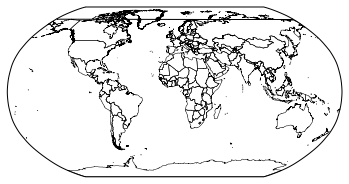

In [118]:
#Read the shape file world_countries_boundary_file_world_2002 
#which contains the information required to plot the value on world map
m = Basemap(projection = 'robin', lon_0 = 0, resolution = 'c') 
shp_info = m.readshapefile("world_countries_boundary_file_world_2002",'country')

#dataframe to store the country iso information, which can be used to plot the colour on the map
countrynames=[]

for shapedict in m.country_info:
    countryname = shapedict['GMI_CNTRY']
    try:
        av = colors[countryname]
    except KeyError:
        #country names present in shape file but not in the integrated dataset, we can default the colour to green
        colors[countryname] = "green"
    countrynames.append(countryname)

np.unique(countrynames)


Now we shall plot the world map using the information from the shapefile

(0.0, 33973592.329973608, 0.0, 17230998.10013628)

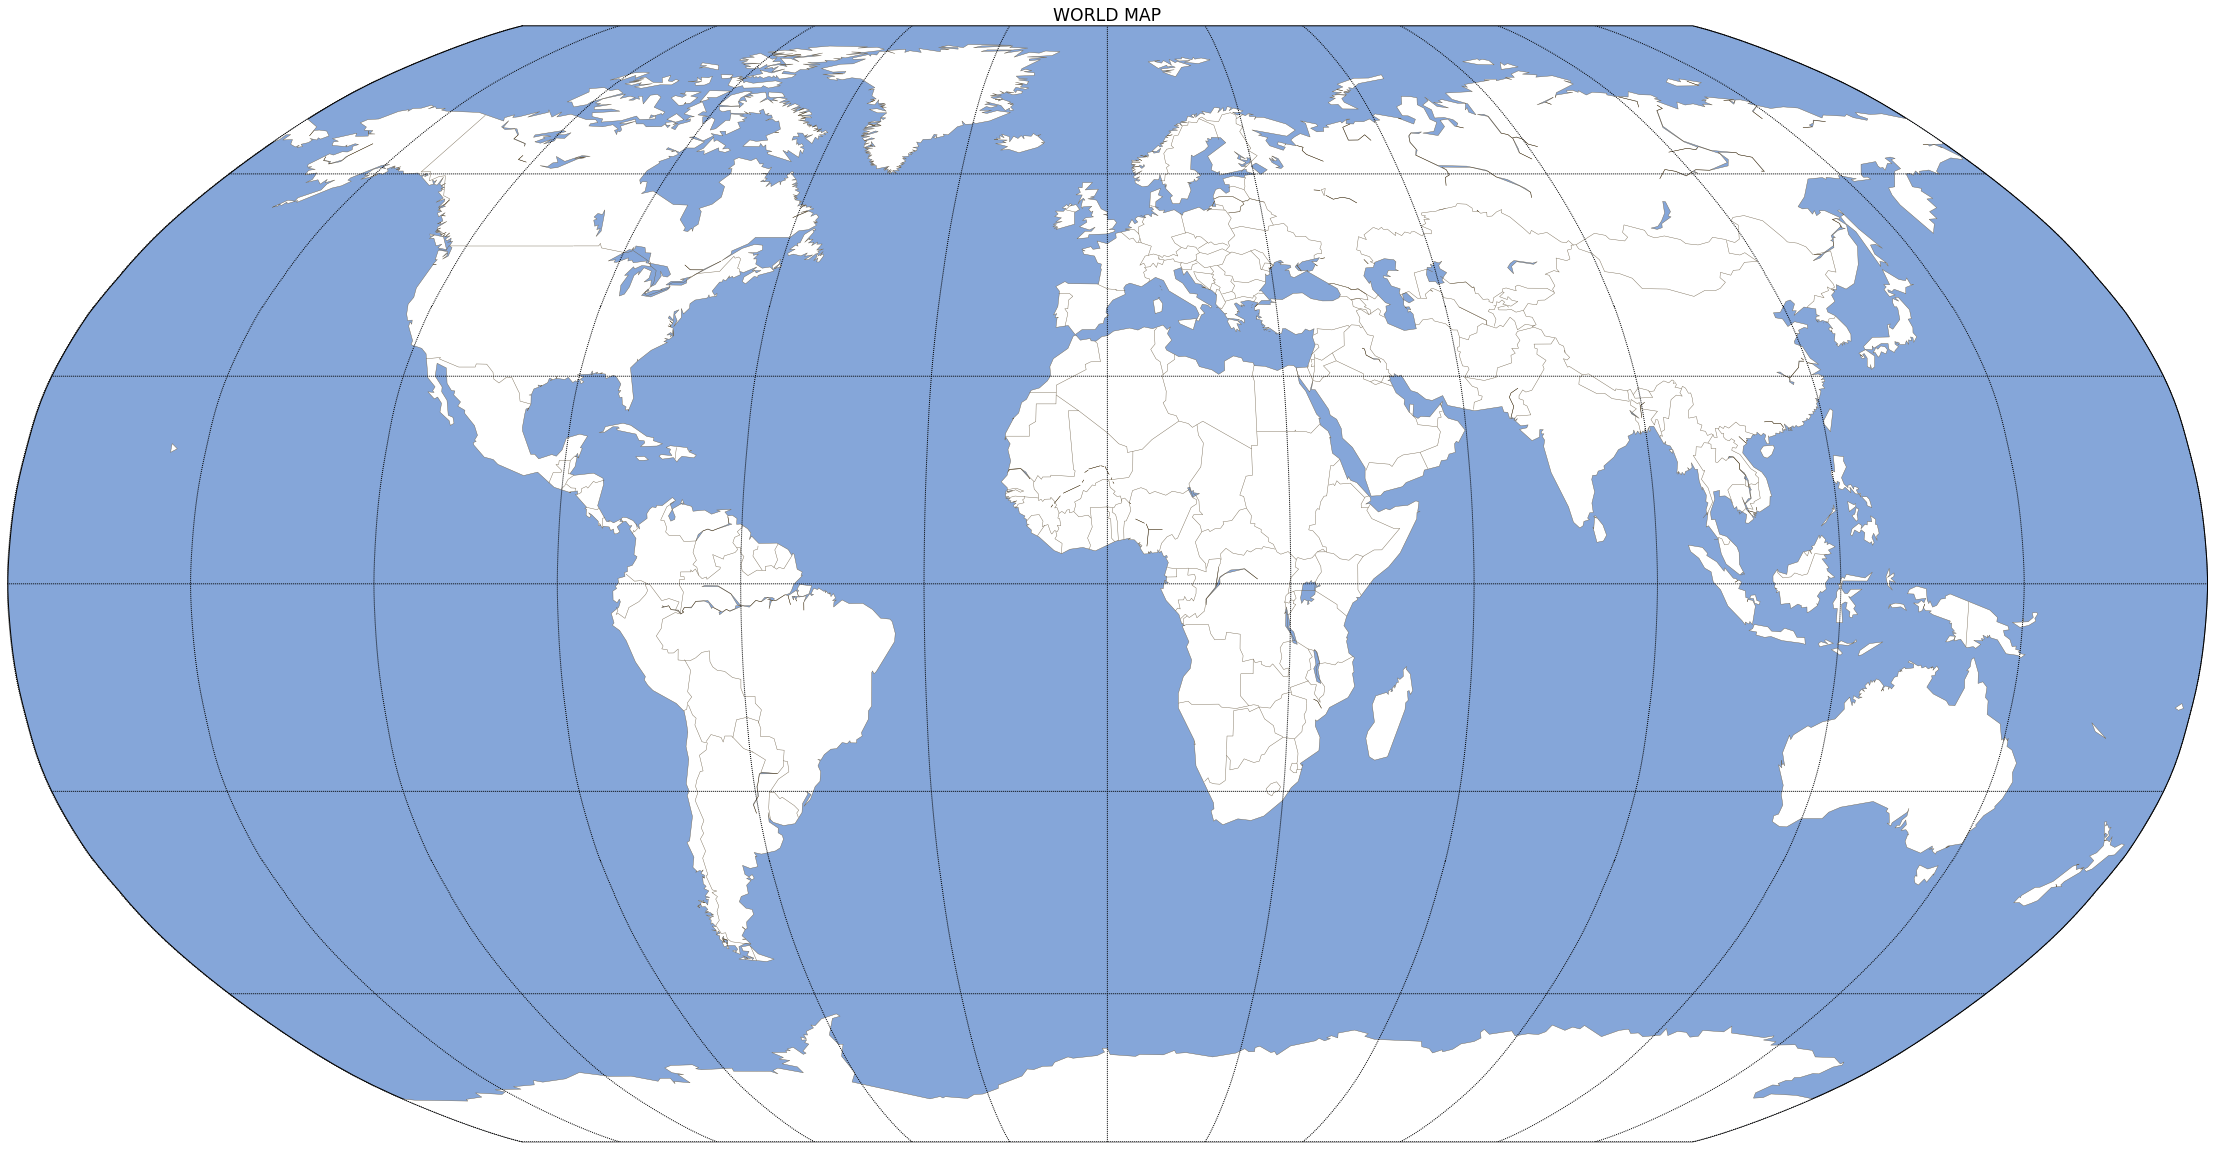

In [119]:
from matplotlib.collections import LineCollection

plt.figure(figsize=(50,20))
#plot the default details and draw few latitudes and longitudes and draw the boundaries of all the countries
m.drawmapboundary(fill_color = '#85A6D9')
m.fillcontinents(color = 'white', lake_color = '#85A6D9') 
m.drawcoastlines(color = '#6D5F47', linewidth = .4) 
m.drawcountries(color = '#6D5F47', linewidth = .4)
m.drawmeridians(np.arange(-180, 180, 30), color = 'black') 
m.drawparallels(np.arange(-90, 90, 30), color = 'black')

plt.title('WORLD MAP',fontsize='xx-large')
plt.gca().axis("off")


>>**2.5) PLOT SAMPLE ON WORLD MAP **<BR>

We now need to plot the integrated dataset onto world map based on the count of occurences and the colour code that we have defined.

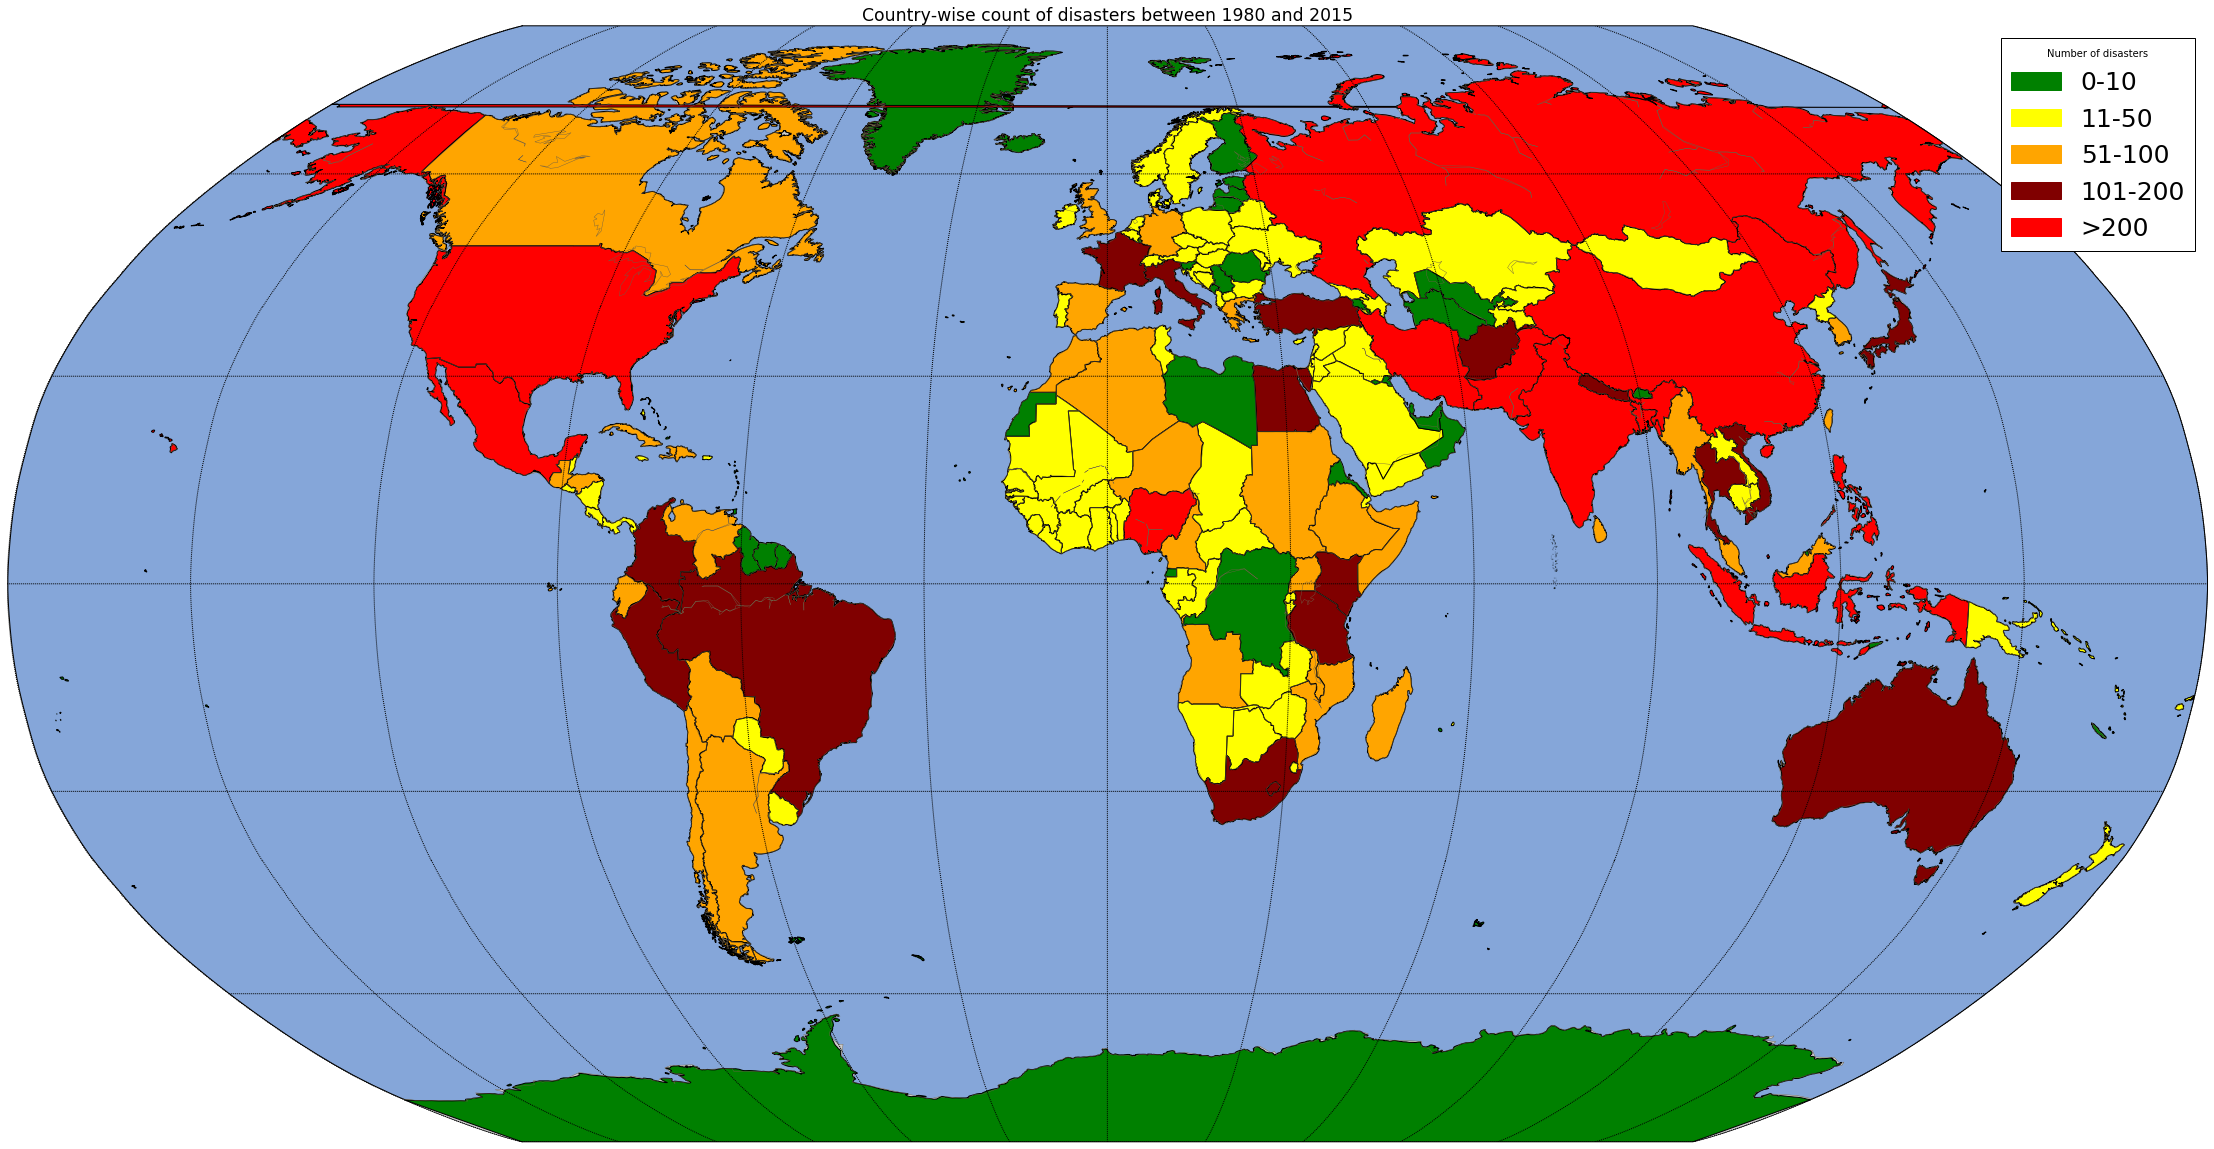

In [120]:
from matplotlib.collections import LineCollection

#display map in large size
plt.figure(figsize=(50,20))

m.drawmapboundary(fill_color = '#85A6D9')
m.fillcontinents(lake_color = '#85A6D9') 
m.drawcoastlines(color = '#6D5F47', linewidth = .4) 
m.drawcountries(color = '#6D5F47', linewidth = .4)
m.drawmeridians(np.arange(-180, 180, 30), color = 'black') 
m.drawparallels(np.arange(-90, 90, 30), color = 'black')

#fetch information for each country from shape file to plot them accordingly
for nshape,seg in enumerate(m.country):
    xx,yy = zip(*seg)
    #color code of each country is fetched based on values that were already set in colors dataframe
    plt.fill(xx,yy,colors[countrynames[nshape]])
   
plt.title('Country-wise count of disasters between 1980 and 2015',fontsize='xx-large')
plt.gca().axis("off")

#To create legend for the colour code used
import matplotlib.patches as mpatches

l10 = mpatches.Patch(color='green', label='0-10')
l50 = mpatches.Patch(color='yellow', label='11-50')
l100 = mpatches.Patch(color='orange', label='51-100')
l200 = mpatches.Patch(color='maroon', label='101-200')
g200 = mpatches.Patch(color='red', label='>200')

plt.legend(handles=[l10,l50,l100,l200,g200], loc=1, title='Number of disasters', prop={'size':25})

plt.show()

We have successfully plotted the world map with countries being coloured according to the colour code defined for the number of occurences of disasters betwen 1980 and 2015.